<a href="https://colab.research.google.com/github/JOIVELOP/Sistemas-Cognitivos-Artificiales/blob/main/Copia_de_Copia_de_Actividad_1_master_IA_SCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [25]:
#Importación de librería(s)
import tensorflow as tf
print(tf.__version__)

2.15.0



1.   T-shirt/top (Camiseta o top).
2.   Trouser/pants (Pantalones).
3.   Pullover shirt (Pullover).
4.   Dress (Vestido).
5.   Coat (Abrigo).
6.   Sandal (Sandalias).
7.   Shirt (Camisa).
8.   Sneaker (Zapatos deportivos).
9.   Bag (Bolso o maleta)
10.  Ankle boot (Botines).


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [26]:
#Importación del dataset Fashion
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [27]:
#Carga de conjuntos de entrenamiento
##Matriz de imágenes | Vector de etiqueta | Matriz de imagenes de prueba | Vector que contiene etiquetas  | Carga de datos##
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
##(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()##

In [28]:
print (f'Número de entrenamiento {training_images.shape}')
print (f'Número de etiquetas de entrenamiento {training_labels.shape}')
print (f'Número de prueba {test_images.shape}')
print (f'Número de etiquetas de prueba {test_labels.shape}')

Número de entrenamiento (60000, 28, 28)
Número de etiquetas de entrenamiento (60000,)
Número de prueba (10000, 28, 28)
Número de etiquetas de prueba (10000,)


Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

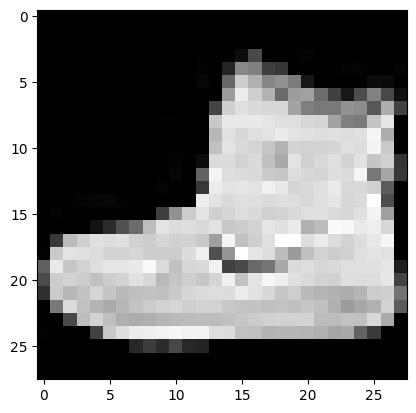

In [29]:
#Importación de librería(s)
import numpy as np
np.set_printoptions(linewidth=200)
#Importación de librería(s)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#Impresión de datos
print(training_labels[0])
#Impresión de imagen
print(training_images[0])

In [30]:
import pandas as pd

variables_de_entrada = pd.DataFrame(training_images[0])
variables_de_entrada.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3


Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [31]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas que las imágenes cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [32]:
### Tu código para la red neuronal de la pregunta 1 aquí ###
model= tf.keras.models.Sequential()
#capa de entrada
#Flatten
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#Dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Sequential
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


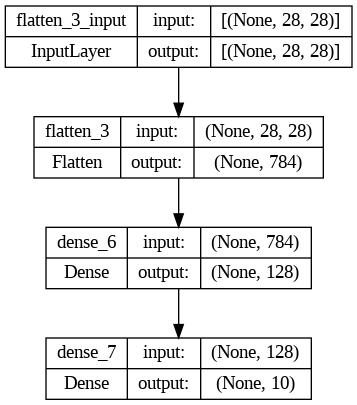

In [34]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [35]:
#Compilación
model.compile(optimizer = 'sgd',
              #modelo de clasificaicón
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
#Entrenamiento
history=model.fit(training_images,training_labels, epochs=10, validation_data=(test_images, test_labels) ,batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.8869 - accuracy: 0.7164 - val_loss: 0.6558 - val_accuracy: 0.7751
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5847 - accuracy: 0.8048 - val_loss: 0.5720 - val_accuracy: 0.8033
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 0.5231 - accuracy: 0.8233 - val_loss: 0.5317 - val_accuracy: 0.8148
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.4913 - accuracy: 0.8314 - val_loss: 0.5212 - val_accuracy: 0.8124
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4706 - accuracy: 0.8389 - val_loss: 0.5099 - val_accuracy: 0.8150
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.4545 - accuracy: 0.8432 - val_loss: 0.4819 - val_accuracy: 0.8313
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.4420 - accuracy: 0.8460 - val_loss: 0.4757 - val_accuracy: 0.8282
Epoch 

Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [37]:
#Evaluación del modelo
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.8442


[0.4468277394771576, 0.8442000150680542]

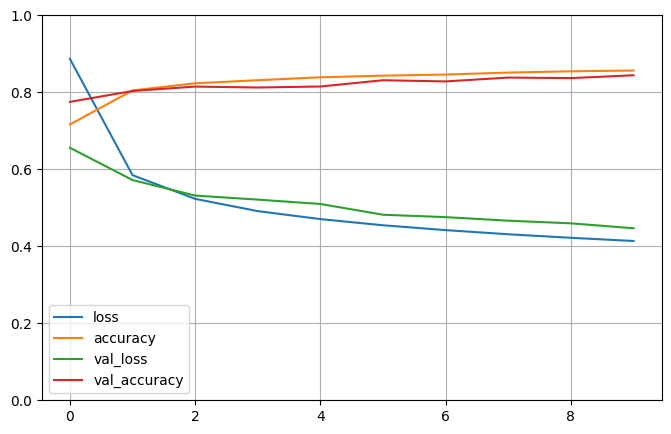

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###
# Evaluar el optimizador
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.8442
Test accuracy: 0.8442000150680542


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos:

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones.

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números,
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [40]:
### Tu código del clasificador de la pregunta 3 aquí ###
classifications = model.predict(test_images)
print(classifications[0])
class_index = np.argmax(classifications[0])

class_names = {
    0: 'Ankle boot (Botines)',
    1: 'T-shirt/top (Camiseta o top)',
    2: 'Dress (Vestido)',
    3: 'Pullover shirt (Pullover)',
    4: 'Coat (Abrigo)',
    5: 'Sandal (Sandalias)',
    6: 'Shirt (Camisa)',
    7: 'Sneaker (Zapatos deportivos)',
    8: 'Bag (Bolso o maleta)',
    9: 'Trouser/pants (Pantalones)'
}
#Aquí tengo duda, me gustaría poder recibir una retro

print("La clase de la primera entrada es:", class_names[class_index])


# Impresión de la etiqueta de la primera imagen
print("La posición es: ", training_labels[0])

# Print the class name of the first image in the training set
class_names = {
    0: 'T-shirt/top (Camiseta o top)',
    1: 'Trouser/pants (Pantalones)',
    2: 'Pullover shirt (Pullover)',
    3: 'Dress (Vestido)',
    4: 'Coat (Abrigo)',
    5: 'Sandal (Sandalias)',
    6: 'Shirt (Camisa)',
    7: 'Sneaker (Zapatos deportivos)',
    8: 'Bag (Bolso o maleta)',
    9: 'Ankle boot (Botines)'
}
print("El nombre de la primera clase de la images es::", class_names[training_labels[0]])

313/313 [==============================] - 1s 3ms/step
[1.2634587e-05 1.5221360e-06 1.0291791e-05 5.9211584e-06 1.4377669e-05 1.1567318e-01 5.5676333e-05 1.2788758e-01 1.5803728e-03 7.5475842e-01]
La clase de la primera entrada es: Trouser/pants (Pantalones)
La posición es:  9
El nombre de la primera clase de la images es:: Ankle boot (Botines)


Tu respuesta a la pregunta 3.1 aquí:

En primera, predict, devuelve una matriz, cada columna representa una clase y en este caso que es una fila, representa la imagen.
Mostrando la salida de la imagen.

Tu respuesta a la pregunta 3.2 aquí:
Cómo se muestra en class_index, es: 9

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [41]:
### Tu código para 512 neuronas aquí ###
model= tf.keras.models.Sequential()
#capa de entrada
#Flatten
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#Dense
model.add(tf.keras.layers.Dense(512, activation='relu'))
#Sequential
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [42]:
#Compilación
model.compile(optimizer = 'sgd',
              #modelo de clasificaicón
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamiento
history=model.fit(training_images,training_labels, epochs=10, validation_data=(test_images, test_labels) ,batch_size=64)

model.evaluate(test_images, test_labels)


Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.8406 - accuracy: 0.7382 - val_loss: 0.6360 - val_accuracy: 0.7858
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5643 - accuracy: 0.8159 - val_loss: 0.5512 - val_accuracy: 0.8096
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.5082 - accuracy: 0.8305 - val_loss: 0.5217 - val_accuracy: 0.8217
Epoch 4/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4782 - accuracy: 0.8382 - val_loss: 0.4928 - val_accuracy: 0.8308
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4574 - accuracy: 0.8433 - val_loss: 0.4748 - val_accuracy: 0.8354
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4425 - accuracy: 0.8481 - val_loss: 0.4660 - val_accuracy: 0.8374
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4301 - accuracy: 0.8519 - val_loss: 0.4553 - val_accuracy: 0.8402
Epoch 

[0.4372822344303131, 0.8457000255584717]

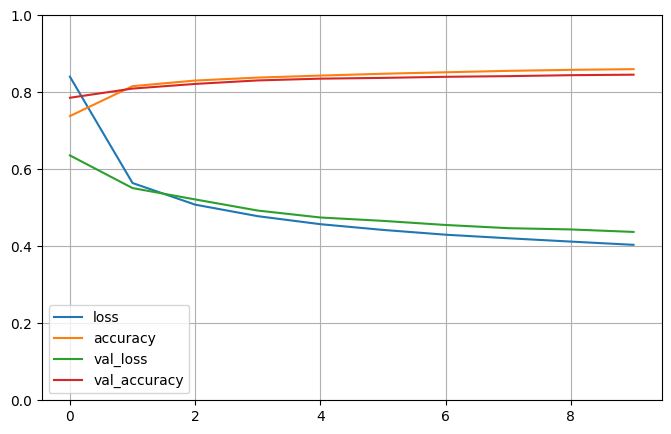

In [43]:
#512
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
### Tu código para 1024 neuronas aquí ###
model= tf.keras.models.Sequential()
#capa de entrada
#Flatten
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#Dense
model.add(tf.keras.layers.Dense(1024, activation='relu'))
#Sequential
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
#Compilación
model.compile(optimizer = 'sgd',
              #modelo de clasificaicón
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Entrenamiento
history=model.fit(training_images,training_labels, epochs=10, validation_data=(test_images, test_labels) ,batch_size=64)

model.evaluate(test_images, test_labels)

Epoch 1/10
938/938 [==============================] - 11s 12ms/step - loss: 0.8148 - accuracy: 0.7493 - val_loss: 0.6183 - val_accuracy: 0.7949
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.5547 - accuracy: 0.8194 - val_loss: 0.5583 - val_accuracy: 0.8048
Epoch 3/10
938/938 [==============================] - 11s 11ms/step - loss: 0.4998 - accuracy: 0.8332 - val_loss: 0.5115 - val_accuracy: 0.8246
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4704 - accuracy: 0.8410 - val_loss: 0.4992 - val_accuracy: 0.8257
Epoch 5/10
938/938 [==============================] - 11s 12ms/step - loss: 0.4516 - accuracy: 0.8468 - val_loss: 0.4742 - val_accuracy: 0.8329
Epoch 6/10
938/938 [==============================] - 10s 10ms/step - loss: 0.4365 - accuracy: 0.8505 - val_loss: 0.4638 - val_accuracy: 0.8392
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4243 - accuracy: 0.8541 - val_loss: 0.4581 - val_accuracy:

[0.4334458112716675, 0.8476999998092651]

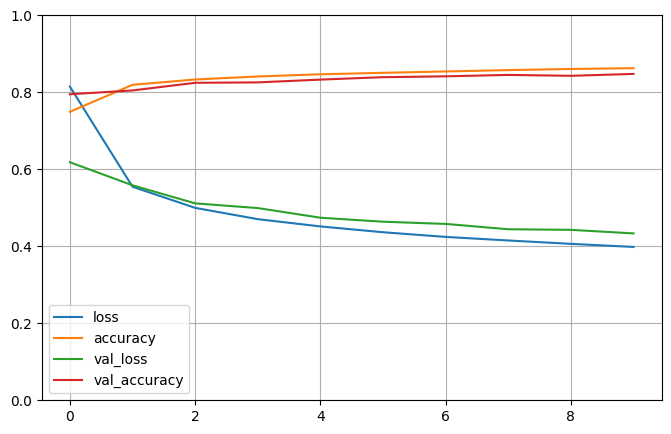

In [46]:
#1024
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Tu respuesta a la pregunta 4.3 aquí:
A lo que noto en primera instancia entre los dos tipos de respuestas donde impactan el número de neuronas, que ligeramente hay cambios, pero, en el de 1024, en la gráfica se aprecia considerablemente en las 1024 neuronas, hay más aproximación que a comparación de 512.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**:

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.1 (0.25 puntos)**:

* ¿Porque crees que ha ocurrido esto?

In [47]:
### Tu código del clasificador de la pregunta 5 aquí ###
#512
classifications = model.predict(test_images)
print(classifications[0])
class_index = np.argmax(classifications[0])

class_names = {
    0: 'T-shirt/top (Camiseta o top)',
    1: 'Trouser/pants (Pantalones)',
    2: 'Pullover shirt (Pullover)',
    3: 'Dress (Vestido)',
    4: 'Coat (Abrigo)',
    5: 'Sandal (Sandalias)',
    6: 'Shirt (Camisa)',
    7: 'Sneaker (Zapatos deportivos)',
    8: 'Bag (Bolso o maleta)',
    9: 'Ankle boot (Botines)'
}


print("La clase de la primera entrada es:", class_names[class_index])

313/313 [==============================] - 2s 6ms/step
[1.9771231e-05 5.1918728e-06 1.9397736e-05 1.2588231e-05 1.4342565e-05 7.5365596e-02 5.8769809e-05 2.5904515e-01 6.2100231e-03 6.5924919e-01]
La clase de la primera entrada es: Ankle boot (Botines)


In [48]:
#1024
classifications = model.predict(test_images)
print(classifications[0])
class_index = np.argmax(classifications[0])

class_names = {
    0: 'T-shirt/top (Camiseta o top)',
    1: 'Trouser/pants (Pantalones)',
    2: 'Pullover shirt (Pullover)',
    3: 'Dress (Vestido)',
    4: 'Coat (Abrigo)',
    5: 'Sandal (Sandalias)',
    6: 'Shirt (Camisa)',
    7: 'Sneaker (Zapatos deportivos)',
    8: 'Bag (Bolso o maleta)',
    9: 'Ankle boot (Botines)'
}


print("La clase de la primera entrada es:", class_names[class_index])

313/313 [==============================] - 1s 4ms/step
[1.9771231e-05 5.1918728e-06 1.9397736e-05 1.2588231e-05 1.4342565e-05 7.5365596e-02 5.8769809e-05 2.5904515e-01 6.2100231e-03 6.5924919e-01]
La clase de la primera entrada es: Ankle boot (Botines)


Tu respuesta a la pregunta 5.1 aquí:
De acuerdo a mis resultados: Ankle boot (Botines) (9)

Tu respuesta a la pregunta 5.2 aquí:
Cómo anterior me sucedió, los resultados: Ankle boot (Botines) (9)

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [49]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###
model= tf.keras.models.Sequential()
#capa de entrada
#Flatten
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
#Dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
#Sequential
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [50]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Tu respuesta a la pregunta 6 aquí:
Pues a lo que he estado viendo, marca que no se ha construido un modelo para poder llamar un lote de datos.
La capa Flatten sirve cómo tal para transformar
las matrices de imagenes, ya que son bidimencionales y la capa Dense necesita unidimensional, técniamente es un transformador.


# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [64]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###
model = tf.keras.models.Sequential()
# capa de entrada
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
# Dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
# capa de salida con 5 neuronas
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels,
                    epochs=5,
                    validation_data=(test_images, test_labels),
                    batch_size=64)


Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-64-3a6295850c9a>", line 14, in <cell line: 14>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 4 3 4 1 1 3 7 3 8 2 8 9 2 9 1 2 9 7 9 5 9 1 8 9 1 7 6 0 8 6 4 5 3 4 4 1 6 4 7 7 2 4 1 3 3 3 0 9 5 3 2 6 1 0 9 9 2 0 8 5 7 6 0 3
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_412055]

Tu respuestas a la pregunta 7.1 aquí: son 10 debido a que son 10 labels, así a cada neurona le corresponde una etiqueta cómo tal, por ende, queda perfecto de 10 a las 10 etiquetas que en este caso tiene.

Tu respuestas a la pregunta 7.2 aquí: Si el modelo tiene menos de 10, no puede permitir el aprendizaje correcto de la neurona los patrones complejos, haciendo una tendencia de una precisión baja o nula, dependiendo el esceneario.
En caso de que sea mayor, el caso es todo lo contrario, este permite y da tiempo para que pueda aprender con mayor eficiencia, además de que puede tener una precisión más alta, sin embargo, también puede ser un contra a esto, debido a que puede haber un sobre ajuste.


# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.



Epoch 1/15
938/938 [==============================] - 4s 4ms/step - loss: 0.8854 - accuracy: 0.7236 - val_loss: 0.6656 - val_accuracy: 0.7775
Epoch 2/15
938/938 [==============================] - 3s 4ms/step - loss: 0.5834 - accuracy: 0.8069 - val_loss: 0.5676 - val_accuracy: 0.8082
Epoch 3/15
938/938 [==============================] - 4s 4ms/step - loss: 0.5214 - accuracy: 0.8234 - val_loss: 0.5285 - val_accuracy: 0.8168
Epoch 4/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4887 - accuracy: 0.8331 - val_loss: 0.5063 - val_accuracy: 0.8278
Epoch 5/15
938/938 [==============================] - 5s 5ms/step - loss: 0.4681 - accuracy: 0.8394 - val_loss: 0.4899 - val_accuracy: 0.8316
Epoch 6/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4514 - accuracy: 0.8449 - val_loss: 0.4795 - val_accuracy: 0.8344
Epoch 7/15
938/938 [==============================] - 4s 4ms/step - loss: 0.4394 - accuracy: 0.8487 - val_loss: 0.4635 - val_accuracy: 0.8381
Epoch 

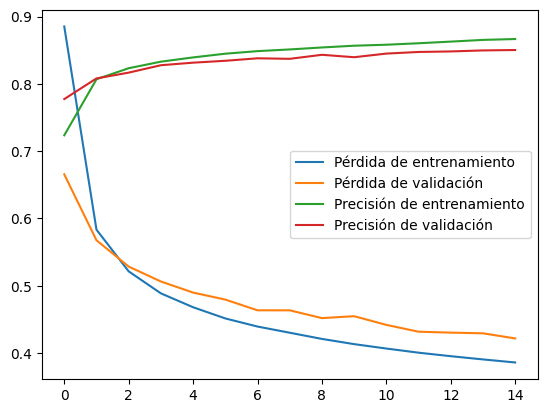

In [65]:
### Tu código para 15 epoch aquí ###
model = tf.keras.models.Sequential()
# capa de entrada
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
# Dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
# capa de salida con 10 neuronas
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels,
                    epochs=15,
                    validation_data=(test_images, test_labels),
                    batch_size=64)

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.show()

Epoch 1/30
938/938 [==============================] - 4s 3ms/step - loss: 0.8796 - accuracy: 0.7237 - val_loss: 0.6638 - val_accuracy: 0.7675
Epoch 2/30
938/938 [==============================] - 4s 4ms/step - loss: 0.5827 - accuracy: 0.8080 - val_loss: 0.5649 - val_accuracy: 0.8093
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.5228 - accuracy: 0.8244 - val_loss: 0.5292 - val_accuracy: 0.8192
Epoch 4/30
938/938 [==============================] - 3s 4ms/step - loss: 0.4911 - accuracy: 0.8333 - val_loss: 0.5068 - val_accuracy: 0.8243
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 0.4713 - accuracy: 0.8386 - val_loss: 0.4881 - val_accuracy: 0.8287
Epoch 6/30
938/938 [==============================] - 8s 8ms/step - loss: 0.4560 - accuracy: 0.8443 - val_loss: 0.4767 - val_accuracy: 0.8326
Epoch 7/30
938/938 [==============================] - 5s 5ms/step - loss: 0.4442 - accuracy: 0.8473 - val_loss: 0.4728 - val_accuracy: 0.8337
Epoch 

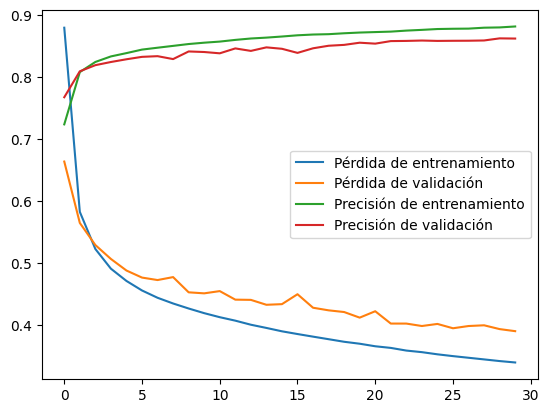

In [71]:
### Tu código para 30 epoch aquí ###
model = tf.keras.models.Sequential()
# capa de entrada
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
# Dense
model.add(tf.keras.layers.Dense(128, activation='relu'))
# capa de salida con 10 neuronas
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_images, training_labels,
                    epochs=30,
                    validation_data=(test_images, test_labels),
                    batch_size=64)

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.legend()
plt.show()

Tu respuesta a la pregunta 8.3 aquí:
Al momento de que aumente el número e epoch de entrenamiento, la red neuronal se vuelve cada vez más especializada y cómo tal no hace tendencia o generaliza el conjunto de entrenamiento.
Para ambos casos de 15 y 30, considero que aún no se desarrolla su máxima capacidad de aprendizaje al igual que también un exceso de datos puede dar lugar a una menor probabilidad de sobre ajuste, ya que en este comportamiento los patrones pueden ir especializandose para una mejor precisión en el conjunto de entrenamiento, pero puede ligeramente decaer en su conjunto de prueba.

# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [72]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True


# Creamos una instancia de la clase de callback
early_stopping_callback = myCallback()

# Entrenamos el modelo con el callback
history = model.fit(training_images, training_labels,
                    epochs=30,
                    validation_data=(test_images, test_labels),
                    batch_size=64,
                    callbacks=[early_stopping_callback])

Epoch 1/30
929/938 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.8826
Alcanzado el 85% de precisión, se cancela el entrenamiento!!
938/938 [==============================] - 4s 4ms/step - loss: 0.3376 - accuracy: 0.8825 - val_loss: 0.3832 - val_accuracy: 0.8633


**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [73]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') < 0.4):
            print("\n Pérdida alcanzó el 40%, se cancela el entrenamiento!!")
            self.model.stop_training = True


callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.15.0
Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4766 - accuracy: 0.8288
Epoch 2/50
1869/1875 [============================>.] - ETA: 0s - loss: 0.3597 - accuracy: 0.8691
 Pérdida alcanzó el 40%, se cancela el entrenamiento!!
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3593 - accuracy: 0.8692
